In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

df = pd.read_excel("cars.xlsx")



df.head(6)


Index(['Id', 'type', 'prix', 'cylindree', 'puissance', 'poids', 'conso'], dtype='object')

In [34]:
# les variables
df.keys()

Index(['Id', 'type', 'prix', 'cylindree', 'puissance', 'poids', 'conso'], dtype='object')

In [18]:
x1 = np.array(df["cylindree"]).reshape((-1,1))
y1 = df['puissance']

model = LinearRegression()
results = model.fit(x1,y1)

print("Coeficient determination: \n", results.score(x1, y1))
print("Intercept: \n", results.intercept_)
print("Slope: \n", results.coef_)

Coeficient determination: 
 0.9264320565625961
Intercept: 
 -24.163623713709967
Slope: 
 [0.05791742]


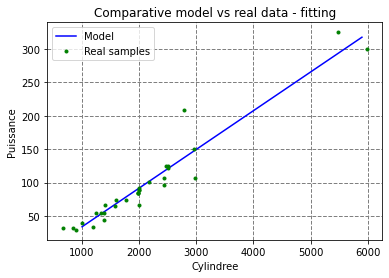

In [25]:
# Verification Graphique

def Yy(m, b, x):
    return m*x + b;

Xmodel = range(1000,6000, 100)
Ymodel = Yy(results.coef_, results.intercept_,  Xmodel)

#plt.figure(figsize=(8, 6))
plt.plot(Xmodel, Yy(results.coef_, results.intercept_,  Xmodel), 'b-', label='Model')
plt.plot(df['cylindree'], df['puissance'], 'g.', label='Real samples')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Puissance")
plt.xlabel("Cylindree")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.show()

In [27]:
#Verification avec la fontion statmodels
from statsmodels.formula.api import ols

model1 = ols('puissance ~ cylindree', data=df).fit()

print("Results summary: \n", model1.summary())

Results summary: 
                             OLS Regression Results                            
Dep. Variable:              puissance   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     365.2
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.62e-18
Time:                        12:35:17   Log-Likelihood:                -134.44
No. Observations:                  31   AIC:                             272.9
Df Residuals:                      29   BIC:                             275.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1636      7.216 

In [31]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Yreal = df['puissance']
Ypredicted = Yy(results.coef_, results.intercept_,  df['cylindree'])
 
model_compare = pd.concat([Ytrue, Ypredicted])

data = [Yreal, Ypredicted]

headers = ["Real Measured Puissance", "Predicted Puissance"]

df2 = pd.concat(data, axis=1, keys=headers)
print(df2)

print("Erreur quadratique moyenne: ", np.sqrt(mean_squared_error(Yreal, Ypredicted)))
print("Erreur moyenne en valeur absolu: ", mean_absolute_error(Yreal, Ypredicted))
print("R2: ", r2_score(Yreal, Ypredicted))

    Real Measured Puissance  Predicted Puissance
0                        32            24.834515
1                        39            33.348376
2                        29            27.904138
3                        44            56.341592
4                        33            45.047695
5                        55            52.924465
6                       300           322.587980
7                       209           137.368065
8                        74            68.330499
9                        74            77.828956
10                      101           101.227594
11                       85            90.686623
12                       85            90.744541
13                       89            91.555385
14                       54            56.341592
15                       66            56.689097
16                      106           116.865298
17                       55            47.769814
18                      107           147.966953
19                  

In [35]:
x1 = df['cylindree']
x2 = df['conso']
y = df['puissance']

In [37]:
#Model

modelMulti = ols('y ~ x1 + x2', data=df).fit()
print(modelMulti.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     243.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.97e-18
Time:                        13:18:37   Log-Likelihood:                -129.75
No. Observations:                  31   AIC:                             265.5
Df Residuals:                      28   BIC:                             269.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.8222     11.612     -4.721      0.0

In [38]:
# Les coeficients
    
modelMulti.params
modelMulti.mse_resid

Intercept   -54.822171
x1            0.034728
x2            7.956969
dtype: float64

In [39]:
modelMulti.mse_resid

280.0253496226268